Embeddings shape: (125510, 129)
Metadata shape: (125510, 11)
Merged shape: (125510, 139)


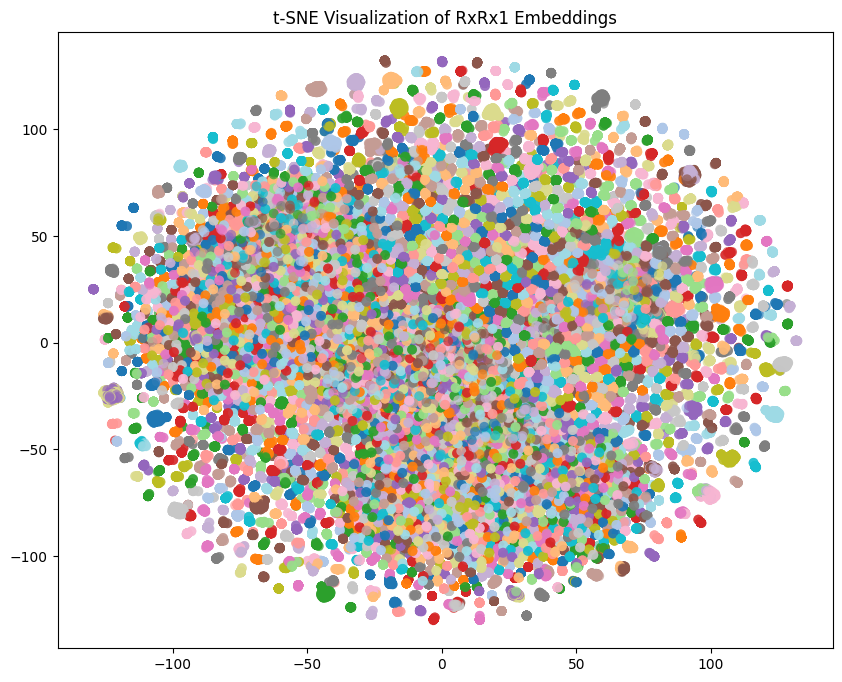

C:\Users\asimw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


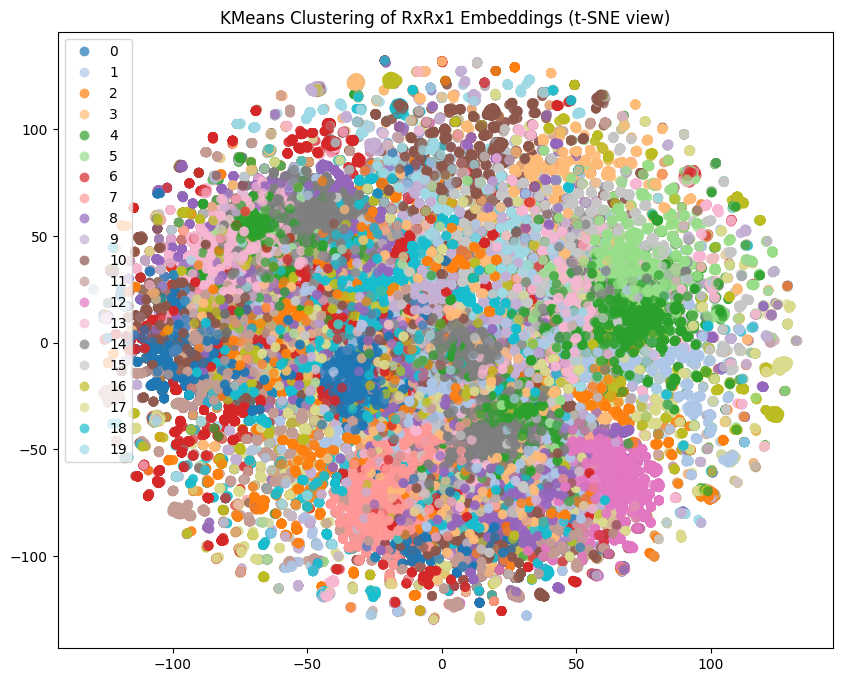

In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# 2. Load embeddings + metadata
embeddings_df = pd.read_csv(r"C:\Users\asimw\OneDrive\Desktop\BioStack Platform\data\embeddings.csv")
metadata_df = pd.read_csv(r"C:\Users\asimw\OneDrive\Desktop\BioStack Platform\data\metadata.csv")

print("Embeddings shape:", embeddings_df.shape)
print("Metadata shape:", metadata_df.shape)

# 3. Merge embeddings with metadata
# Assuming embeddings_df has 'site_id' as a key column → adjust if different
merged_df = pd.merge(embeddings_df, metadata_df, on="site_id")
print("Merged shape:", merged_df.shape)

# 4. Prepare data for t-SNE/UMAP
# Drop non-embedding columns → keep only embedding vectors
embedding_columns = [col for col in embeddings_df.columns if col != "site_id"]
X = merged_df[embedding_columns].values

# Encode labels (sirna_id or cell_type)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(merged_df["sirna_id"])  # or "cell_type" if preferred

# 5. Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# 6. Plot t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab20", s=50, linewidth=0, alpha=0.7)
plt.title("t-SNE Visualization of RxRx1 Embeddings")
plt.legend([],[], frameon=False)  # hide legend if too many classes
plt.show()

# 7. Optional: Run KMeans clustering
kmeans = KMeans(n_clusters=20, random_state=42)  # adjust clusters as needed
cluster_labels = kmeans.fit_predict(X)

# Plot with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=cluster_labels, palette="tab20", s=50, linewidth=0, alpha=0.7)
plt.title("KMeans Clustering of RxRx1 Embeddings (t-SNE view)")
plt.show()